# 파이썬 의한계
- 순수 파이썬으로 리스트의 각 요소에 5를 더하는 경우
- 어레이를 사용하는 경우

In [1]:
import numpy as np

# 대용량 데이터
large_list = list(range(1000000))
large_array = np.array(large_list)

def list_operation():
  for i in range(len(large_list)):
    large_list[i] += 5

%timeit list_operation()
%timeit large_array + 5

226 ms ± 90.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.09 ms ± 532 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Numpy Arrays

In [3]:
# NumPy 라이브러리 임포트
import numpy as np

# 파이썬 리스트와 NumPy 배열 비교
py_list = [1, 2, 3, 4, 5]
np_array = np.array(py_list)

print(f"파이썬 리스트 타입: {type(py_list)}")
print(f"NumPy 배열 타입: {type(np_array)}")
print("---")

# NumPy 배열의 주요 속성
print(f"배열의 데이터 타입(dtype): {np_array.dtype}") # 배열 원소들의 자료형
print(f"배열의 형태(shape): {np_array.shape}")      # 배열의 차원과 크기
print(f"배열의 차원(ndim): {np_array.ndim}")        # 배열의 차원 수
print("---")


# 벡터화 연산: 배열의 모든 요소에 5를 더하기
# for 반복문 없이 단 한 줄로 연산이 가능하다.
result_array = np_array + 5
print(f"NumPy 벡터화 연산 결과: {result_array}")

# 파이썬 리스트로 동일한 작업을 하려면 리스트 컴프리헨션이나 for 루프가 필요하다.
result_list = [x + 5 for x in py_list]
print(f"파이썬 리스트 연산 결과: {result_list}")
print("---")

# 다양한 방법으로 배열 생성하기
zeros_array = np.zeros((2, 3))         # 2x3 크기의 0으로 채워진 배열
ones_array = np.ones(5)                # 크기가 5이고 1로 채워진 1차원 배열
range_array = np.arange(0, 10, 2)      # 0부터 10 전까지 2씩 증가하는 배열

print(f"0으로 채워진 2x3 배열:\n{zeros_array}")
print(f"1로 채워진 크기 5 배열: {ones_array}")
print(f"0에서 10까지 2씩 증가하는 배열: {range_array}")

파이썬 리스트 타입: <class 'list'>
NumPy 배열 타입: <class 'numpy.ndarray'>
---
배열의 데이터 타입(dtype): int64
배열의 형태(shape): (5,)
배열의 차원(ndim): 1
---
NumPy 벡터화 연산 결과: [ 6  7  8  9 10]
파이썬 리스트 연산 결과: [6, 7, 8, 9, 10]
---
0으로 채워진 2x3 배열:
[[0. 0. 0.]
 [0. 0. 0.]]
1로 채워진 크기 5 배열: [1. 1. 1. 1. 1.]
0에서 10까지 2씩 증가하는 배열: [0 2 4 6 8]


- Monthe Carlo simulation 예제 (pi 계산)

In [4]:
# Python
import random

def estimate_pi(n):
    inside = 0
    for _ in range(n):
        x = random.random()
        y = random.random()
        if x**2 + y**2 <= 1:
            inside += 1
    return (4 * inside) / n

print("추정된 파이:", estimate_pi(100000))

추정된 파이: 3.1402


In [5]:
# Numpy
import numpy as np
n = 100000
x = np.random.rand(n)
y = np.random.rand(n)

pi = 4 * (x**2 + y**2 <= 1.0).sum() / n
print(pi)

3.13792


# Pandas

## Series와 DataFrame 생성하기

In [7]:
import pandas as pd
import numpy as np

# Series 생성 (인덱스를 지정하지 않으면 0부터 자동 생성)
s = pd.Series([10, 20, 30, 40],
              index=['a', 'b', 'c', 'd'])
print("--- Series ---")
print(s)
print(f"Series의 값: {s.values}")
print(f"Series의 인덱스: {s.index}")

# DataFrame 생성 (파이썬 딕셔너리를 활용)
data = {
    '도시': ['서울', '부산', '인천', '대구'],
    '인구수': [940, 330, 290, 240],
    'GRDP(조원)': [483, 97, 95, 69]  # 지역내 총생산
}
df = pd.DataFrame(data)

print("--- DataFrame ---")
print(df)
print("--- DataFrame의 정보 요약: ---")
df.info() # 데이터프레임의 전반적인 정보를 보여줌

--- Series ---
a    10
b    20
c    30
d    40
dtype: int64
Series의 값: [10 20 30 40]
Series의 인덱스: Index(['a', 'b', 'c', 'd'], dtype='object')
--- DataFrame ---
   도시  인구수  GRDP(조원)
0  서울  940       483
1  부산  330        97
2  인천  290        95
3  대구  240        69
--- DataFrame의 정보 요약: ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   도시        4 non-null      object
 1   인구수       4 non-null      int64 
 2   GRDP(조원)  4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 228.0+ bytes


## CSV 파일 읽고 쓰기

In [9]:
# DataFrame 생성 후 CSV 파일로 저장
sample_df = pd.DataFrame({
    'ID': range(1, 6),
    'Product': ['A', 'B', 'C', 'A', 'B'],
    'Price': [1000, 1500, 1200, 900, 1600],
    'Quantity': [5, 3, 8, 4, 2]
})
sample_df.to_csv('sample_data.csv', index=False) # index=False는 행 인덱스를 파일에 저장하지 않는 옵션

# 저장된 CSV 파일 읽기
df_from_csv = pd.read_csv('sample_data.csv')

print("--- CSV 파일로부터 읽어온 DataFrame ---")
print(df_from_csv)

# 데이터의 첫 5개 행 확인: head()
print("--- df.head() ---")
print(df_from_csv.head()) # 기본값은 5개 행

# 데이터의 마지막 3개 행 확인: tail()
print("--- df.tail(3) ---")
print(df_from_csv.tail(3))

# 데이터의 첫 2개와 마지막 2개 행 확인: pd.concat([,])
print("--- pd.concat([,]) ---")
print(pd.concat([df_from_csv.head(2), df_from_csv.tail(2)]))

--- CSV 파일로부터 읽어온 DataFrame ---
   ID Product  Price  Quantity
0   1       A   1000         5
1   2       B   1500         3
2   3       C   1200         8
3   4       A    900         4
4   5       B   1600         2
--- df.head() ---
   ID Product  Price  Quantity
0   1       A   1000         5
1   2       B   1500         3
2   3       C   1200         8
3   4       A    900         4
4   5       B   1600         2
--- df.tail(3) ---
   ID Product  Price  Quantity
2   3       C   1200         8
3   4       A    900         4
4   5       B   1600         2
--- pd.concat([,]) ---
   ID Product  Price  Quantity
0   1       A   1000         5
1   2       B   1500         3
3   4       A    900         4
4   5       B   1600         2


## Indexing and Slicing

In [10]:
# 데이터 확인
print("--- 원본 데이터 ---")
print(df_from_csv)
print("---")

# loc를 이용한 선택 (행 인덱스 레이블 2, 열 이름 'Product'와 'Price')
row2_product_price = df_from_csv.loc[2, ['Product', 'Price']]
print(f"loc[2, ['Product', 'Price']]:\n{row2_product_price}\n")

# 행 인덱스 1부터 3까지, 모든 열 선택 (loc는 끝점을 포함)
rows_1_to_3 = df_from_csv.loc[1:3]
print(f"loc[1:3]:\n{rows_1_to_3}\n")
print("---")

# iloc를 이용한 선택 (2번 위치의 행(세 번째 행), 1번 위치의 열(두 번째 열))
val_at_2_1 = df_from_csv.iloc[2, 1]
print(f"iloc[2, 1]의 값: {val_at_2_1}\n")

# 1번~3번 위치까지의 행(iloc는 끝점을 포함하지 않음), 0번~2번 위치까지의 열
slice_data = df_from_csv.iloc[1:4, 0:3]
print(f"iloc[1:4, 0:3]:\n{slice_data}")

--- 원본 데이터 ---
   ID Product  Price  Quantity
0   1       A   1000         5
1   2       B   1500         3
2   3       C   1200         8
3   4       A    900         4
4   5       B   1600         2
---
loc[2, ['Product', 'Price']]:
Product       C
Price      1200
Name: 2, dtype: object

loc[1:3]:
   ID Product  Price  Quantity
1   2       B   1500         3
2   3       C   1200         8
3   4       A    900         4

---
iloc[2, 1]의 값: C

iloc[1:4, 0:3]:
   ID Product  Price
1   2       B   1500
2   3       C   1200
3   4       A    900


## 불리언 인덱싱을 이용한 데이터 필터링

In [12]:
# Price가 1200보다 큰 행만 필터링
high_price_df = df_from_csv[df_from_csv['Price'] > 1200]
print("--- 가격이 1200보다 큰 상품 ---")
print(high_price_df)
print("\n")

# Product가 'A' 이거나 'C'인 행 필터링
# 여러 조건을 연결할 때는 & (AND), | (OR)를 사용하고, 각 조건은 괄호로 묶어야 한다.
product_A_or_C = df_from_csv[(df_from_csv['Product'] == 'A') | (df_from_csv['Product'] == 'C')]
print("--- 상품이 A 또는 C인 경우 ---")
print(product_A_or_C)

--- 가격이 1200보다 큰 상품 ---
   ID Product  Price  Quantity
1   2       B   1500         3
4   5       B   1600         2


--- 상품이 A 또는 C인 경우 ---
   ID Product  Price  Quantity
0   1       A   1000         5
2   3       C   1200         8
3   4       A    900         4


## 데이터 정제 및 가공

In [14]:
import pandas as pd
import numpy as np

# 1. 정제가 필요한 데이터프레임 생성
data = {
    '판매일': ['2025-07-10', '2025-07-11', '2025-07-11', '2025-07-12', '2025-07-13', '2025-07-14'],
    '제품코드': ['A01', 'B02', 'A01', np.nan, 'C03', 'B02'],
    '판매수량': [5, 8, np.nan, 3, 7, 999], # 999는 이상치
    '개당가격': [1500, 3000, 1600, 5000, 2500, 2900]
}
dirty_df = pd.DataFrame(data)
print("--- 1. 원본(정제 전) 데이터 ---")
print(dirty_df)
print("\n")


--- 1. 원본(정제 전) 데이터 ---
          판매일 제품코드   판매수량  개당가격
0  2025-07-10  A01    5.0  1500
1  2025-07-11  B02    8.0  3000
2  2025-07-11  A01    NaN  1600
3  2025-07-12  NaN    3.0  5000
4  2025-07-13  C03    7.0  2500
5  2025-07-14  B02  999.0  2900




In [16]:
# 2. 결측치 처리
print("--- 2. 결측치 확인 (처리 전) ---")
print(dirty_df.isnull().sum()) # 열(column)별 결측치 개수 확인
print("\n")

# '제품코드'의 결측치는 'Unknown'으로, '판매수량'의 결측치는 0으로 채우기
df_filled = dirty_df.fillna({'제품코드': 'Unknown', '판매수량': 0})
print("--- 결측치 처리 후 데이터 ---")
print(df_filled)
print("\n")


--- 2. 결측치 확인 (처리 전) ---
판매일     0
제품코드    1
판매수량    1
개당가격    0
dtype: int64


--- 결측치 처리 후 데이터 ---
          판매일     제품코드   판매수량  개당가격
0  2025-07-10      A01    5.0  1500
1  2025-07-11      B02    8.0  3000
2  2025-07-11      A01    0.0  1600
3  2025-07-12  Unknown    3.0  5000
4  2025-07-13      C03    7.0  2500
5  2025-07-14      B02  999.0  2900




In [17]:
# 3. 데이터 가공 (타입 변경, 정렬, 인덱스 재설정)
# '판매수량'이 float(실수)이므로 int(정수)로 변경
df_filled['판매수량'] = df_filled['판매수량'].astype(int)

# '개당가격' 기준으로 내림차순 정렬 후, 인덱스를 새로 부여
df_sorted = df_filled.sort_values(by='개당가격', ascending=False).reset_index(drop=True)
# reset_index(drop=True): 기존의 뒤죽박죽된 인덱스를 버리고 0부터 새로 시작하는 인덱스를 생성
print("--- 3. 정렬 및 인덱스 재설정 후 데이터 ---")
print(df_sorted)
print("\n")


--- 3. 정렬 및 인덱스 재설정 후 데이터 ---
          판매일     제품코드  판매수량  개당가격
0  2025-07-12  Unknown     3  5000
1  2025-07-11      B02     8  3000
2  2025-07-14      B02   999  2900
3  2025-07-13      C03     7  2500
4  2025-07-11      A01     0  1600
5  2025-07-10      A01     5  1500




In [18]:
# 4. 이상치 탐지 (판매수량 기준)
# IQR(Interquartile Range) 방법을 사용 (Q1: 1사분위수(25%), Q3: 3사분위수(75%))
Q1 = df_filled['판매수량'].quantile(0.25)
Q3 = df_filled['판매수량'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR # 정상 범위 하한
upper_bound = Q3 + 1.5 * IQR # 정상 범위 상한

print("--- 4. '판매수량' 이상치 탐지 ---")
print(f"정상 범위: {lower_bound:.2f} ~ {upper_bound:.2f}")

# 정상 범위를 벗어나는 데이터 필터링
outliers = df_filled[(df_filled['판매수량'] < lower_bound) | (df_filled['판매수량'] > upper_bound)]
print("탐지된 이상치:")
print(outliers)

--- 4. '판매수량' 이상치 탐지 ---
정상 범위: -2.88 ~ 14.12
탐지된 이상치:
          판매일 제품코드  판매수량  개당가격
5  2025-07-14  B02   999  2900


## groupby를 이용한 그룹별 집계

In [20]:
import pandas as pd

# 그룹화 데이터프레임 생성
df_group = pd.DataFrame({
    'Product': ['A', 'B', 'A', 'B', 'A', 'C'],
    'Store': ['강남', '강남', '잠실', '잠실', '강남', '잠실'],
    'Price': [1000, 1500, 1100, 1600, 900, 2000],
    'Quantity': [5, 3, 8, 4, 10, 2]
})
print("--- 원본 데이터 ---")
print(df_group)
print("\n" + "="*30 + "\n")


--- 원본 데이터 ---
  Product Store  Price  Quantity
0       A    강남   1000         5
1       B    강남   1500         3
2       A    잠실   1100         8
3       B    잠실   1600         4
4       A    강남    900        10
5       C    잠실   2000         2




In [21]:
# 1. 단일 기준으로 그룹화
# 'Product'를 기준으로 그룹화하여 판매수량(Quantity)의 합계를 계산
product_quantity_sum = df_group.groupby('Product')['Quantity'].sum()
print("--- 1. 제품별 총 판매수량 ---")
print(product_quantity_sum)
print("\n")

--- 1. 제품별 총 판매수량 ---
Product
A    23
B     7
C     2
Name: Quantity, dtype: int64




In [24]:
df_group.groupby('Product')['Quantity'].sum()

,Quantity
Product,
A,23
B,7
C,2


In [27]:
df_group.groupby('Product')[['Quantity','Price']].sum()

,Quantity,Price
Product,,
A,23,3000
B,7,3100
C,2,2000


In [28]:
# 2. 다중 기준으로 그룹화
# 'Store'와 'Product'를 기준으로 그룹화하여 판매수량(Quantity)의 합계를 계산
# 인덱스가 다중으로 생성된다 (MultiIndex)
store_product_sum = df_group.groupby(['Store', 'Product'])['Quantity'].sum()
print("--- 2. 매장/제품별 총 판매수량 ---")
store_product_sum


--- 2. 매장/제품별 총 판매수량 ---


Store  Product
강남     A          15
       B           3
잠실     A           8
       B           4
       C           2
Name: Quantity, dtype: int64

In [29]:
# 3. 여러 집계 함수를 한 번에 적용 (agg)
# agg() 메서드를 사용하면 여러 열에 대해 각기 다른 집계 함수를 동시에 적용할 수 있다.
# 제품별로 가격(Price)의 평균과 판매수량(Quantity)의 합계 및 최대값을 계산

agg_summary = df_group.groupby('Product').agg(
    Avg_Price=('Price', 'mean'),
    Total_Quantity=('Quantity', 'sum'),
    Max_Quantity=('Quantity', 'max')
)
print("--- 3. agg를 이용한 맞춤형 집계 ---")
agg_summary

--- 3. agg를 이용한 맞춤형 집계 ---


,Avg_Price,Total_Quantity,Max_Quantity
Product,,,
A,1000.0,23,10
B,1550.0,7,4
C,2000.0,2,2


## concat과 merge를 이용한 데이터 결합

In [33]:
import pandas as pd

# --- 1. pd.concat: 데이터프레임 이어 붙이기 ---
df1 = pd.DataFrame({'A': ['A0', 'A1'], 'B': ['B0', 'B1']})
df2 = pd.DataFrame({'A': ['A2', 'A3'], 'B': ['B2', 'B3']})

print(df1)
print(df2)
# axis=0 (기본값): 위아래로 연결
df_concat = pd.concat([df1, df2], ignore_index=True)
# ignore_index=True: 기존 인덱스를 무시하고 0부터 새로 부여
print("--- 1. pd.concat 결과 ---")
df_concat


    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
--- 1. pd.concat 결과 ---


,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [36]:
# --- 2. pd.merge: 특정 키를 기준으로 병합 ---
# 고객 정보와 주문 정보 데이터프레임 생성

customer_df = pd.DataFrame({
    'customer_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
})
order_df = pd.DataFrame({
    'order_id': [101, 102, 103],
    'customer_id': [2, 3, 5], # customer_id 1, 4는 주문X, 5는 고객 정보에 없음
    'product': ['키보드', '마우스', '모니터']
})


In [37]:
customer_df

,customer_id,name
0,1,Alice
1,2,Bob
2,3,Charlie
3,4,David


In [38]:
order_df

,order_id,customer_id,product
0,101,2,키보드
1,102,3,마우스
2,103,5,모니터


In [39]:
# Inner Join (교집합): 양쪽에 모두 존재하는 키(customer_id 2, 3)만 합친다.

df_inner = pd.merge(customer_df, order_df, on='customer_id', how='inner')
print("--- Inner Join 결과 (교집합) ---")
df_inner

--- Inner Join 결과 (교집합) ---


,customer_id,name,order_id,product
0,2,Bob,101,키보드
1,3,Charlie,102,마우스


In [40]:
# Left Join: 왼쪽(customer_df) 기준으로 합친다. 주문이 없는 고객(1, 4)도 결과에 포함된다.

df_left = pd.merge(customer_df, order_df, on='customer_id', how='left')
print("--- Left Join 결과 (왼쪽 기준) ---")
df_left


--- Left Join 결과 (왼쪽 기준) ---


,customer_id,name,order_id,product
0,1,Alice,NaN,NaN
1,2,Bob,101.0,키보드
2,3,Charlie,102.0,마우스
3,4,David,NaN,NaN


In [41]:
# Outer Join (합집합): 양쪽의 모든 데이터를 포함하여 합친다.
# 한쪽에만 존재하는 데이터의 경우, 다른 쪽의 열은 NaN(Not a Number)으로 채워진다.

df_outer = pd.merge(customer_df, order_df, on='customer_id', how='outer')
print("--- Outer Join 결과 (합집합) ---")
df_outer

--- Outer Join 결과 (합집합) ---


,customer_id,name,order_id,product
0,1,Alice,NaN,NaN
1,2,Bob,101.0,키보드
2,3,Charlie,102.0,마우스
3,4,David,NaN,NaN
4,5,NaN,103.0,모니터


In [42]:
df1

,A,B
0,A0,B0
1,A1,B1


In [43]:
df2

,A,B
0,A2,B2
1,A3,B3


In [44]:
pd.concat([df1, df2], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


## (신규) Pandas 2.x의 새로운 기능과 성능

In [45]:
import pandas as pd
import numpy as np
import random
import string

In [46]:
pd.__version__

'2.2.2'

### NumPy 백엔드 vs. Arrow 백엔드
  - ArrowDtype (열기반 데이터 구조)의 장점 - 시간

- pd.DataFrame() 생성자에는 dtype_backend 키워드가 없다. 이 키워드는 pd.read_csv()와 같은 I/O 함수에 주로 사용된다.
- NumPy 배열이나 딕셔너리처럼 이미 메모리에 있는 데이터로 Arrow 백엔드 데이터프레임을 만들려면, 먼저 NumPy 기반으로 생성한 뒤 타입을 변환하는 방식을 사용해야 한다.

In [54]:
num_rows = 10_000_000
num_cols = 10
data = {f'c{i}': np.random.rand(num_rows) for i in range(num_cols)}
df_numpy = pd.DataFrame(data)                                # 행 기반 정렬
df_arrow = df_numpy.convert_dtypes(dtype_backend='pyarrow')  # 열 기반 정렬

# 1번 실행, 3회 반복
%timeit -n 1 -r 3 df_numpy[df_numpy['c0'] > 0.5]['c1'].mean()
%timeit -n 1 -r 3 df_arrow[df_arrow['c0'] > 0.5]['c1'].mean()

405 ms ± 78.7 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
690 ms ± 92.8 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [56]:
%timeit -n 1 -r 3 df_numpy.sort_values(by='c0')
%timeit -n 1 -r 3 df_arrow.sort_values(by='c0')

3.51 s ± 205 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
5.49 s ± 450 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


- 여러가지 이유 (연산 최적화 부족, 호환성 계층(Conversion Overhead) 의 오버헤드, 성숙도 차이)로 아직 wrrow type 이 더 시간이 오래 걸린다.
- arrow type 이 리한 경우는: 파일 IO, arrow 기반 다른 엔진 (Polaris, Spark, 등)과의 데이터 주고 받을 때 유리함.

In [49]:
df_numpy.shape, df_arrow.shape

((10000000, 10), (10000000, 10))

In [53]:
df_numpy.iloc[:5,:5] == df_arrow.iloc[:5,:5]  # 내용은 동일

,c0,c1,c2,c3,c4
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True


- 만약 데이터프레임의 모든 열이 동일한 데이터 타입(예: float64)이라면, Pandas는 이 모든 열을 단 하나의 거대한 2차원 NumPy 배열(단일 블록)에 저장한다.
- 반면, Arrow는 원칙대로 각 열을 별도의 메모리 버퍼로 관리한다.
- 결론적으로, '모든 열의 타입이 동일한' 특수한 상황에서는 NumPy 백엔드의 단일 블록 최적화가 Arrow의 일반적인 열 우선 방식보다 미세하게 더 빠를 수 있다.
- 실제 데이터는 정수, 실수, 문자열 등 다양한 타입이 섞여 있습니다. 이렇게 데이터 타입이 혼합된 현실적인 상황에서 Arrow의 진가가 드러난다.

- Arrow 백엔드의 진정한 장점이 드러나는 경우: 혼합 데이터 타입

In [57]:
import pandas as pd
import numpy as np
import random
import string

# 혼합 타입 데이터프레임 생성 함수
def create_mixed_type_dataframe(n_rows=500_000, n_cols=10):
    data = {}
    for i in range(n_cols):
        if i < 4: # 정수형
            data[f'c{i}'] = np.random.randint(0, 100, size=n_rows)
        elif i < 8: # 실수형
            data[f'c{i}'] = np.random.rand(n_rows)
        else: # 문자열
            letters = string.ascii_lowercase
            data[f'c{i}'] = [''.join(random.choice(letters) for i in range(5)) for _ in range(n_rows)]
    return pd.DataFrame(data)

df_numpy = create_mixed_type_dataframe()
df_arrow = df_numpy.convert_dtypes(dtype_backend='pyarrow')

In [58]:
print(df_numpy[:3], '\n', df_arrow[:3])

   c0  c1  c2  c3        c4        c5        c6        c7     c8     c9
0  28  81  41  28  0.419764  0.468602  0.220628  0.683244  gnktt  resgy
1   5  85  95  84  0.341610  0.681171  0.815675  0.919027  qqrwt  vrbzc
2  24  11  57  59  0.389602  0.299469  0.165909  0.232475  xidog  jfbvj 
    c0  c1  c2  c3        c4        c5        c6        c7     c8     c9
0  28  81  41  28  0.419764  0.468602  0.220628  0.683244  gnktt  resgy
1   5  85  95  84   0.34161  0.681171  0.815675  0.919027  qqrwt  vrbzc
2  24  11  57  59  0.389602  0.299469  0.165909  0.232475  xidog  jfbvj


In [59]:
df_numpy.groupby('c9').agg({'c1': 'sum', 'c7': 'mean'})[:3]

,c1,c7
c9,,
aaaap,80,0.712387
aaabi,96,0.033476
aaabz,43,0.860370


In [60]:
# NumPy 와 Arrow 백엔드 생성 및 성능 측정
%timeit -n 1 -r 3 df_numpy.groupby('c9').agg({'c1': 'sum', 'c7': 'mean'})
%timeit -n 1 -r 3 df_arrow.groupby('c9').agg({'c1': 'sum', 'c7': 'mean'})

1.63 s ± 209 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
480 ms ± 10 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


- NumPy 백엔드: groupby를 수행하기 위해 문자열(c9), 정수(c1), 실수(c7) 데이터가 저장된 각기 다른 메모리 블록들을 계속해서 넘나들어야 한다. 이 과정에서 비효율이 발생하여 시간이 오래 걸린다. (약 1~2초 이상 소요 예상)
- Arrow 백엔드: 필요한 c9, c1, c7 열의 데이터를 각각의 연속적인 메모리 공간에서 효율적으로 읽어와 처리한다. 블록을 넘나드는 과정이 없으므로 훨씬 빠른 성능을 보인다. (약 0.5초 미만 소요 예상)

### 결측치 처리 비교

In [70]:
import pandas as pd
from io import StringIO

# 결측치가 포함된 예제 데이터 (제품 ID가 비어있는 경우가 있음)
csv_data = """
product_id,category,price
101,Book,15000
102,Electronics,890000
,Book,12000
104,Kitchen,45000
"""


In [71]:
pd.read_csv(StringIO(csv_data))   # 문자열을 파일처럼 다루어 데이터 프레임으로 읽음

,product_id,category,price
0,101.0,Book,15000
1,102.0,Electronics,890000
2,NaN,Book,12000
3,104.0,Kitchen,45000


In [72]:
# 1. 기존 방식 (NumPy 백엔드)
# product_id가 정수임에도 불구하고, 결측치(NaN) 때문에 float64로 변환된다.

df_numpy = pd.read_csv(StringIO(csv_data))
print("--- 1. 기존 NumPy 백엔드 정보 ---")
print(df_numpy.info())
# print("\n Numpy 백엔드로 읽은 데이터:\n")
df_numpy


--- 1. 기존 NumPy 백엔드 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  3 non-null      float64
 1   category    4 non-null      object 
 2   price       4 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 228.0+ bytes
None


,product_id,category,price
0,101.0,Book,15000
1,102.0,Electronics,890000
2,NaN,Book,12000
3,104.0,Kitchen,45000


In [74]:
# 2. 새로운 방식 (Arrow 백엔드)
# dtype_backend='pyarrow' 옵션을 통해 Arrow 엔진을 활성화한다.

df_arrow = pd.read_csv(StringIO(csv_data), dtype_backend='pyarrow')
print("--- 2. 새로운 Arrow 백엔드 정보 ---")
print(df_arrow.info())
# print("\n Arrow 백엔드로 읽은 데이터:\n")
df_arrow

--- 2. 새로운 Arrow 백엔드 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   product_id  3 non-null      int64[pyarrow] 
 1   category    4 non-null      string[pyarrow]
 2   price       4 non-null      int64[pyarrow] 
dtypes: int64[pyarrow](2), string[pyarrow](1)
memory usage: 239.0 bytes
None


,product_id,category,price
0,101,Book,15000
1,102,Electronics,890000
2,<NA>,Book,12000
3,104,Kitchen,45000


# Polars - 속도
- Rust 언어로 구현된 초고속 DataFrame 라이브러리
- pandas와 비슷한 API를 제공하지만 성능과 메모리 효율에 훨씬 더 초점을 맞춤.

In [75]:
df_numpy

,product_id,category,price
0,101.0,Book,15000
1,102.0,Electronics,890000
2,NaN,Book,12000
3,104.0,Kitchen,45000


In [76]:
import polars as pl

# Polars로 DataFrame 생성 (Pandas DataFrame에서 변환 가능)
df_polars = pl.from_pandas(df_numpy)
print("\n Polars 데이터프레임:\n", df_polars
      )
# Polars의 Expression API를 이용한 데이터 필터링 및 집계
# 가격(price)이 50000보다 낮은 책(Book)을 찾아 카테고리별 평균 가격 계산
result_polars = (
    df_polars.filter(
        (pl.col("category") == "Book") & (pl.col("price") < 50000)
    )
    .group_by("category")
    .agg(
        pl.col("price").mean().alias("avg_price")
    )
)

print("--- Polars 처리 결과 ---")
print(result_polars)


 Polars 데이터프레임:
 shape: (4, 3)
┌────────────┬─────────────┬────────┐
│ product_id ┆ category    ┆ price  │
│ ---        ┆ ---         ┆ ---    │
│ f64        ┆ str         ┆ i64    │
╞════════════╪═════════════╪════════╡
│ 101.0      ┆ Book        ┆ 15000  │
│ 102.0      ┆ Electronics ┆ 890000 │
│ null       ┆ Book        ┆ 12000  │
│ 104.0      ┆ Kitchen     ┆ 45000  │
└────────────┴─────────────┴────────┘
--- Polars 처리 결과 ---
shape: (1, 2)
┌──────────┬───────────┐
│ category ┆ avg_price │
│ ---      ┆ ---       │
│ str      ┆ f64       │
╞══════════╪═══════════╡
│ Book     ┆ 13500.0   │
└──────────┴───────────┘


In [77]:
df_numpy

,product_id,category,price
0,101.0,Book,15000
1,102.0,Electronics,890000
2,NaN,Book,12000
3,104.0,Kitchen,45000


In [78]:
df_numpy[['product_id', 'price']]

,product_id,price
0,101.0,15000
1,102.0,890000
2,NaN,12000
3,104.0,45000


In [79]:
df_polars.select(['product_id', 'price'])

product_id,price
f64,i64
101.0,15000
102.0,890000
null,12000
104.0,45000


In [80]:
df_numpy[df_numpy['price'] < 50000]

,product_id,category,price
0,101.0,Book,15000
2,NaN,Book,12000
3,104.0,Kitchen,45000


In [81]:
df_polars.filter(pl.col('price') < 50000)

product_id,category,price
f64,str,i64
101.0,"""Book""",15000
null,"""Book""",12000
104.0,"""Kitchen""",45000


In [82]:
df_numpy['new_price'] = df_numpy['price'] * 1.1
df_numpy

,product_id,category,price,new_price
0,101.0,Book,15000,16500.0
1,102.0,Electronics,890000,979000.0
2,NaN,Book,12000,13200.0
3,104.0,Kitchen,45000,49500.0


In [83]:
df_polars = df_polars.with_columns((pl.col('price') * 1.1).alias('new_price'))
df_polars

product_id,category,price,new_price
f64,str,i64,f64
101.0,"""Book""",15000,16500.0
102.0,"""Electronics""",890000,979000.0
null,"""Book""",12000,13200.0
104.0,"""Kitchen""",45000,49500.0


In [84]:
df_numpy.groupby('category').agg(avg_price = ('price', 'mean'))

,avg_price
category,
Book,13500.0
Electronics,890000.0
Kitchen,45000.0


In [85]:
df_polars.group_by('category').agg(pl.col('price').mean().alias('avg_price'))

category,avg_price
str,f64
"""Kitchen""",45000.0
"""Book""",13500.0
"""Electronics""",890000.0


# Dask - 대용량 데이터
- Python 생태계에서 쓰이는 병렬/분산 컴퓨팅 라이브러리
- 주요 특징:
  - 병렬 처리: 여러 CPU 코어를 동시에 활용해 연산 속도를 높임.
  - 분산 처리: 로컬 PC뿐 아니라 클러스터(여러 서버)에서도 동작 가능.
- 데이터가 메모리에 다 안 들어갈 정도로 클 때, 또는 멀티코어 CPU나 클러스터 환경을 활용하고 싶을 때 사용.

In [86]:
import dask.dataframe as dd

# Dask DataFrame은 여러 개의 파일로부터 데이터를 읽어오는 것을 가정
# 여기서는 Pandas DataFrame을 2개의 파티션으로 나누어 Dask DataFrame을 생성
ddf = dd.from_pandas(df_numpy, npartitions=2)

print("--- Dask DataFrame 정보 ---")
print(ddf)
print("\n")

# 연산을 정의해도 즉시 실행되지 않는다. (지연 평가)
# 가격의 평균을 계산하는 작업을 정의
mean_price = ddf.price.mean()

print("--- .compute() 호출 전 ---")
print(mean_price) # 결과값이 아닌, 작업 계획을 담은 객체가 출력됨
print("\n")

# .compute()를 호출하는 시점에 실제 계산이 병렬로 실행된다.
print("--- .compute() 호출 후 ---")
result_dask = mean_price.compute()
print("계산된 평균 가격:", result_dask)

--- Dask DataFrame 정보 ---
Dask DataFrame Structure:
              product_id category  price new_price
npartitions=2                                     
0                float64   string  int64   float64
2                    ...      ...    ...       ...
3                    ...      ...    ...       ...
Dask Name: frompandas, 1 expression
Expr=df


--- .compute() 호출 전 ---
<dask_expr.expr.Scalar: expr=df['price'].mean(), dtype=float64>


--- .compute() 호출 후 ---
계산된 평균 가격: 240500.0


# Matplotlib

- Colab 에서 한글 폰트

In [1]:
# Colab 에서 한글 폰트 설정 - 설중 후에 꼭 다시 runtime restart 해 주어야 함
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')
matplotlib.font_manager._load_fontmanager(try_read_cache=False)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


- Pandas와 Matplotlib를 연동한 기본 시각화

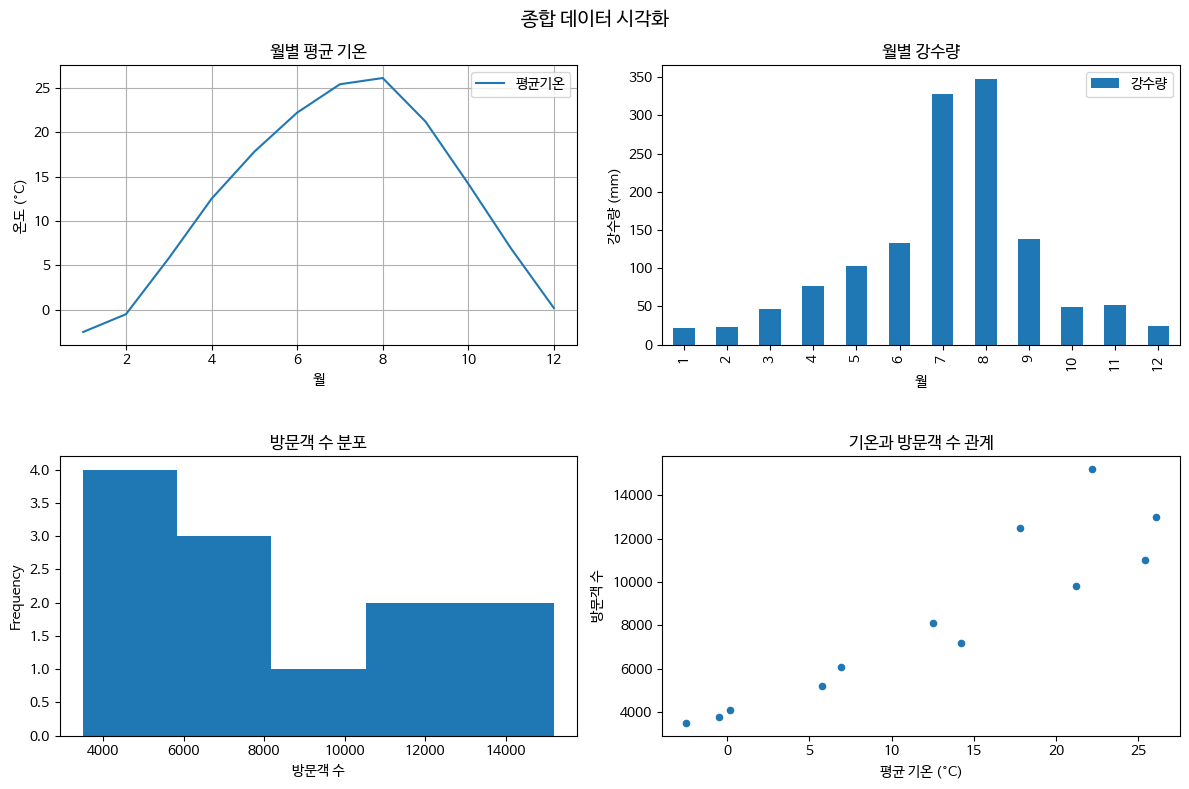

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 예제 데이터프레임
df = pd.DataFrame({
    '월': range(1, 13),
    '평균기온': [ -2.5, -0.5,  5.8, 12.5, 17.8, 22.2, 25.4, 26.1, 21.2, 14.2,  6.9,  0.2],
    '강수량':   [ 21.8, 23.6, 47.2, 77.0, 102.3, 133.3, 327.9, 348.0, 137.6, 49.3, 52.1, 24.9],
    '방문객수': [3500, 3800, 5200, 8100, 12500, 15200, 11000, 13000, 9800, 7200, 6100, 4100]
})

# 2x2 크기의 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('종합 데이터 시각화', fontsize=14)


# 각 서브플롯에 그래프 그리기
# Top-left: 라인 플롯
df.plot(x='월', y='평균기온', kind='line', ax=axes[0, 0], title='월별 평균 기온')
axes[0, 0].set_ylabel('온도 (°C)')
axes[0, 0].grid(True)

# Top-right: 바 플롯
df.plot(x='월', y='강수량', kind='bar', ax=axes[0, 1], title='월별 강수량')
axes[0, 1].set_ylabel('강수량 (mm)')

# Bottom-left: 히스토그램
df['방문객수'].plot(kind='hist', bins=5, ax=axes[1, 0], title='방문객 수 분포')
axes[1, 0].set_xlabel('방문객 수')

# Bottom-right: 산점도
df.plot(x='평균기온', y='방문객수', kind='scatter', ax=axes[1, 1], title='기온과 방문객 수 관계')
axes[1, 1].set_xlabel('평균 기온 (°C)')
axes[1, 1].set_ylabel('방문객 수')

# 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.subplots_adjust(hspace=0.4) # 행 사이의 세로 간격(height space)을 조절.
plt.show()

# 실습 예제: 타이타닉 데이터 셋

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # 데이터셋 로딩을 위해 seaborn 임포트

# 타이타닉 데이터셋 불러오기
titanic_df = sns.load_dataset('titanic')

In [4]:
# 데이터 정보 요약
print("--- 데이터 정보 ---")
titanic_df.info()

# 데이터 앞부분 확인
print("\n--- 데이터 샘플 ---")
print(titanic_df.head(3))

--- 데이터 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

--- 데이터 샘플 ---
   survived  pclass     sex   age  sibsp  parch 

In [5]:
# age 열의 결측치를 중앙값으로 채우기
median_age = titanic_df['age'].median()
titanic_df['age'] = titanic_df['age'].fillna(median_age)

# deck 열 삭제
titanic_df = titanic_df.drop('deck', axis=1)

# embark_town 열의 결측치가 있는 행 삭제
titanic_df = titanic_df.dropna(subset=['embark_town'])

# 결측치 처리 결과 확인
print("--- 결측치 처리 후 정보 ---")
titanic_df.info()

--- 결측치 처리 후 정보 ---
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


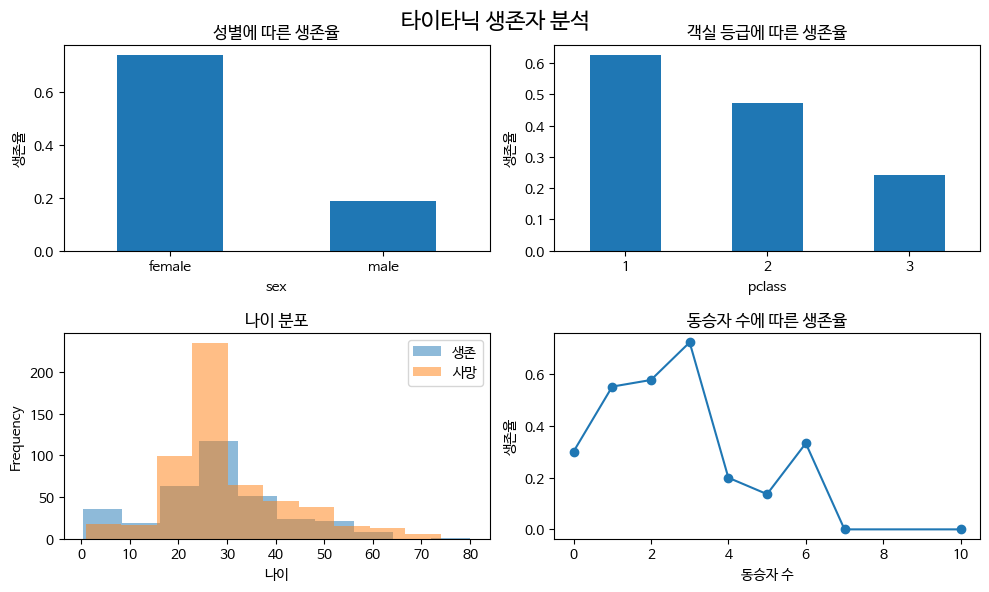

In [6]:
# 2x2 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle('타이타닉 생존자 분석', fontsize=16)

# 1. 성별에 따른 생존율
sex_survival = titanic_df.groupby('sex')['survived'].mean()
sex_survival.plot(kind='bar', ax=axes[0, 0], title='성별에 따른 생존율')
axes[0, 0].set_ylabel('생존율')
axes[0, 0].tick_params(axis='x', rotation=0) # x축 라벨 회전 방지

# 2. 객실 등급에 따른 생존율
pclass_survival = titanic_df.groupby('pclass')['survived'].mean()
pclass_survival.plot(kind='bar', ax=axes[0, 1], title='객실 등급에 따른 생존율')
axes[0, 1].set_ylabel('생존율')
axes[0, 1].tick_params(axis='x', rotation=0)

# 3. 나이 분포
# 생존자와 사망자의 나이 분포를 히스토그램으로 비교
titanic_df[titanic_df['survived'] == 1]['age'].plot(kind='hist', ax=axes[1, 0], alpha=0.5, label='생존', title='나이 분포')
titanic_df[titanic_df['survived'] == 0]['age'].plot(kind='hist', ax=axes[1, 0], alpha=0.5, label='사망')
axes[1, 0].set_xlabel('나이')
axes[1, 0].legend()

# 4. 동승자 수(형제자매/배우자 + 부모/자녀)에 따른 생존율
# 'sibsp'와 'parch'를 더해 'family_size'라는 새로운 열 생성
titanic_df['family_size'] = titanic_df['sibsp'] + titanic_df['parch']
family_survival = titanic_df.groupby('family_size')['survived'].mean()
family_survival.plot(kind='line', ax=axes[1, 1], marker='o', title='동승자 수에 따른 생존율')
axes[1, 1].set_ylabel('생존율')
axes[1, 1].set_xlabel('동승자 수')

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.4) # 주 제목과 그래프 간 간격, 행 간격 조절
plt.show()

# df.plot(), Matplotlib, and Seaborn
- 세 도구는 경쟁 관계가 아닌, 서로를 보완하는 협력 관계
- 일반적인 데이터 분석 워크플로우는 다음과 같다.
  - Pandas로 데이터를 불러오고 정제, 분석한다.
  - Pandas .plot() 이나 Seaborn으로 빠르고 미려한 기본 그래프를 그린다.
  - Matplotlib 함수(plt.title, plt.legend 등)를 추가하여 최종 그래프를 완성하고 세부 사항을 조정한다.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')   # 기본 폰트
plt.rc('axes', unicode_minus=False)    # 마이너스 기호 정상적 출력

# 예제 데이터 생성
data = {
    'x_values': [1, 2, 3, 4, 5, 6, 7, 8],
    'y_values': [10, 12, 15, 14, 18, 20, 25, 24]
}
df = pd.DataFrame(data)


- plt.subplots(): object-oriented 방식
  - 한 번에 Figure 객체와 Axes 객체를 반환
  - 반환된 Axes 객체를 직접 다루면서 ax.plot() 같은 식으로 제어
- plt.subplot(): State-based 방식 (MATLAB 스타일)
  - 하나의 Figure 안에 특정 위치의 하나의 Axes(서브플롯)을 생성하고, 그 Axes를 현재 활성화 상태로 만든다.
  - 호출할 때마다 "지금부터 이 위치에 그려라"라는 의미

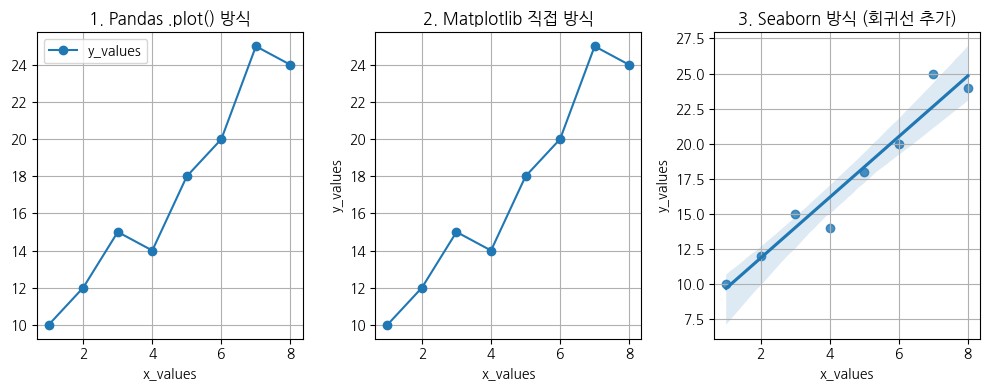

In [10]:
# --- 1. Pandas .plot() 방식 (편리한 자동 모드) ---
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1) # 1x3 격자의 첫 번째 칸

df.plot(x='x_values', y='y_values', kind='line', marker='o', ax=plt.gca())
plt.title('1. Pandas .plot() 방식')
plt.grid(True)


# --- 2. Matplotlib 직접 방식 (완전한 수동 모드) ---
plt.subplot(1, 3, 2) # 1x3 격자의 두 번째 칸

plt.plot(df['x_values'], df['y_values'], marker='o', linestyle='-')
plt.title('2. Matplotlib 직접 방식')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.grid(True)


# --- 3. Seaborn 방식 (고급 템플릿) ---
plt.subplot(1, 3, 3) # 1x3 격자의 세 번째 칸

# Seaborn은 회귀선 추가 같은 통계 기능을 손쉽게 넣을 수 있다.
sns.regplot(x='x_values', y='y_values', data=df) # scatter + regression line
plt.title('3. Seaborn 방식 (회귀선 추가)')    # 신뢰구간 95% 함께 표시
plt.grid(True)

plt.tight_layout()
plt.show()